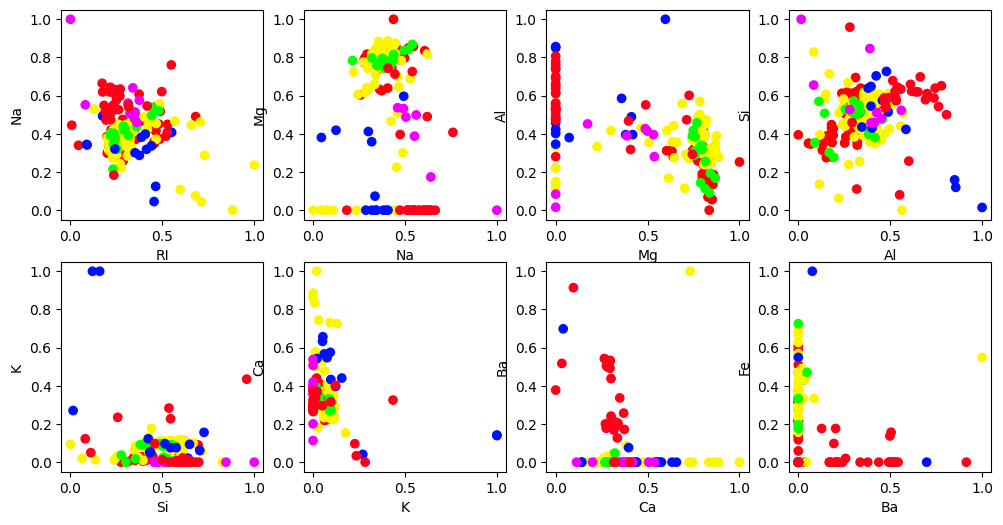

Объясненная дисперсия: [0.45429569 0.17990097]
Собственные числа: [5.1049308  3.21245688]


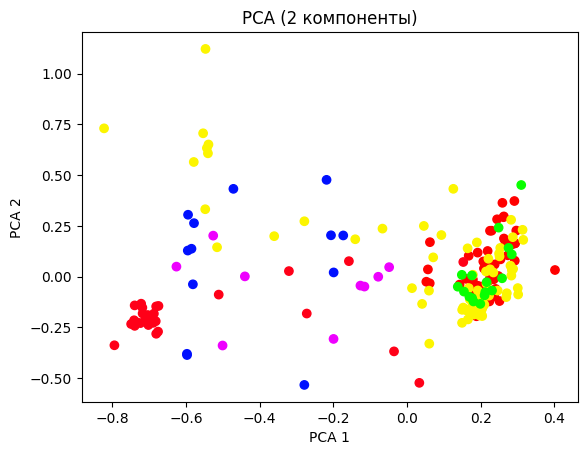

Необходимое количество компонент для 85% дисперсии: 4


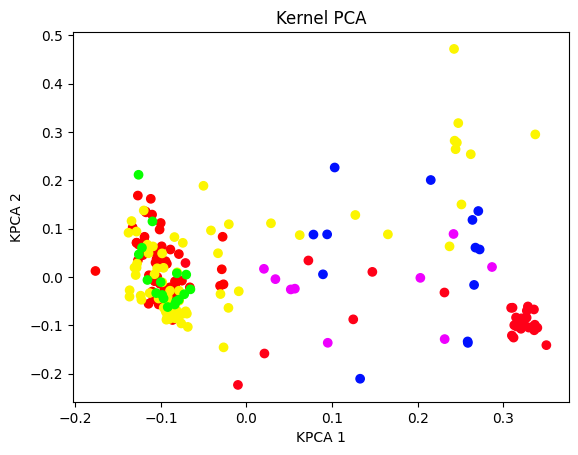

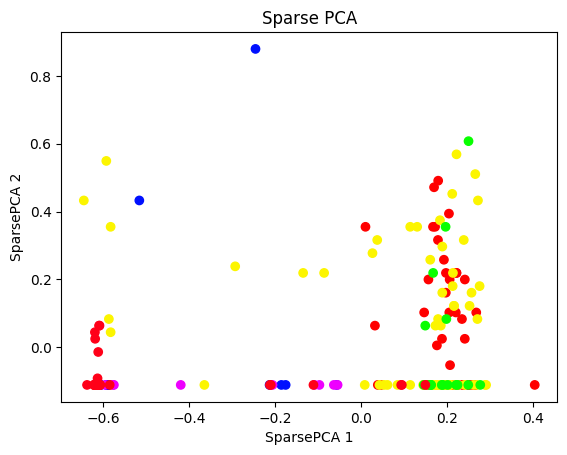

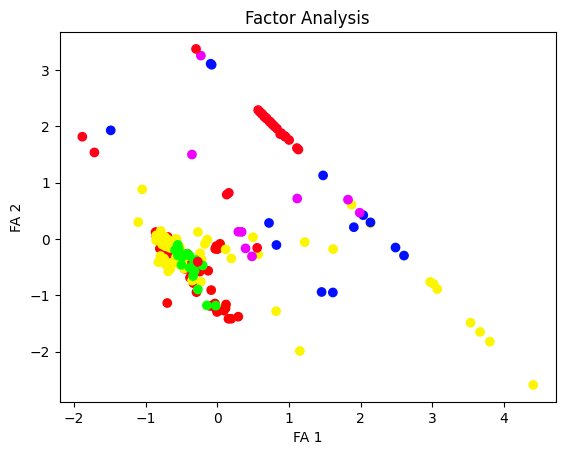

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis

# 1. Загрузка данных
# Читаем CSV-файл в DataFrame
# Последний столбец содержит метки классов, остальные - признаки
df = pd.read_csv('/content/glass.csv')
var_names = list(df.columns)
labels = df.iloc[:, -1].values  # Метки классов
data = df.iloc[:, :-1].values   # Описательные признаки

# 2. Нормализация данных
# Приводим значения всех признаков к диапазону [0,1] для корректного анализа
data = preprocessing.minmax_scale(data)

# 3. Визуализация данных (диаграммы рассеяния)
# Создаем графики для пар признаков
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(data.shape[1] - 1):
    axs[i // 4, i % 4].scatter(data[:, i], data[:, i + 1], c=labels, cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
plt.show()

# 4. Метод главных компонент (PCA)
# PCA - метод уменьшения размерности, выбирающий направления с наибольшей дисперсией
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
print("Объясненная дисперсия:", pca.explained_variance_ratio_)
print("Собственные числа:", pca.singular_values_)

# Визуализация после PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='hsv')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA (2 компоненты)')
plt.show()

# 5. Определение необходимого количества компонент для 85% дисперсии
# Проверяем, сколько компонент нужно, чтобы объяснить не менее 85% разброса данных
pca_full = PCA().fit(data)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_85 = np.argmax(cumsum_var >= 0.85) + 1
print("Необходимое количество компонент для 85% дисперсии:", n_components_85)

# 6. Восстановление данных после PCA
# Применяем обратное преобразование и сравниваем с исходными данными
pca_reconstruct = PCA(n_components=n_components_85)
reduced_data = pca_reconstruct.fit_transform(data)
restored_data = pca_reconstruct.inverse_transform(reduced_data)

# 7. KernelPCA - метод нелинейного уменьшения размерности
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kpca_data = kernel_pca.fit_transform(data)
plt.scatter(kpca_data[:, 0], kpca_data[:, 1], c=labels, cmap='hsv')
plt.xlabel('KPCA 1')
plt.ylabel('KPCA 2')
plt.title('Kernel PCA')
plt.show()

# 8. SparsePCA - разреженный метод главных компонент
sparse_pca = SparsePCA(n_components=2)
sparse_pca_data = sparse_pca.fit_transform(data)
plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='hsv')
plt.xlabel('SparsePCA 1')
plt.ylabel('SparsePCA 2')
plt.title('Sparse PCA')
plt.show()

# 9. Факторный анализ
# Анализирует латентные факторы, влияющие на данные
fa = FactorAnalysis(n_components=2)
fa_data = fa.fit_transform(data)
plt.scatter(fa_data[:, 0], fa_data[:, 1], c=labels, cmap='hsv')
plt.xlabel('FA 1')
plt.ylabel('FA 2')
plt.title('Factor Analysis')
plt.show()
